In [3]:
from _Setup import *
# data has been successfully pathed. Time to import in

c:\AI-ML-AlgorithmsII\AI-ML-Algorithms-II\Week2-Assignment1\Data\Fish.csv


# Introduction
##### This assignment involves analyzing data on fish species. Given data on its shape parameters, we will attempt to predict its weight. 

In [5]:
fish_data = pd.read_csv(rawDataFilePath)
fish_data.head(5)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Great, successfully read into a pandas Dataframe.

There are 7 columns: Species, Weight, Length1, Length2, Length3, Height, and Width.

In [9]:
fish_data.columns


Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

Also has 159 observations.

In [10]:
fish_data.shape

(159, 7)

No values are missing!

In [11]:
fish_data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

It's a pretty basic view of the data, so let's visualize the actual data and not solely a table of numbers.

In [14]:
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Since we also have a categorical variable, let's see what we can gleam from this quick overview. There are 7 unique species in this variable, with Perch being the most common type of fish found 56 times within the data. Again, we'll look closer at each species in a bit.

In [15]:
fish_data.describe(include = object)

,Species
count,159
unique,7
top,Perch
freq,56


First up, the Species variable. We expand to see the distribution of species within the data and see that in order of frequency, is as follows: Perch, Bream, Roach, Pike, Smelt, Parkki, and Whitefish. Nothing too out of the ordinary but the representation of Whitefish in the data hopefully matches its distribution in the actual population, because it only accounts for 3.77% of all fish in the data.

Text(0.5, 1.0, 'Barplot of the Species Variable')

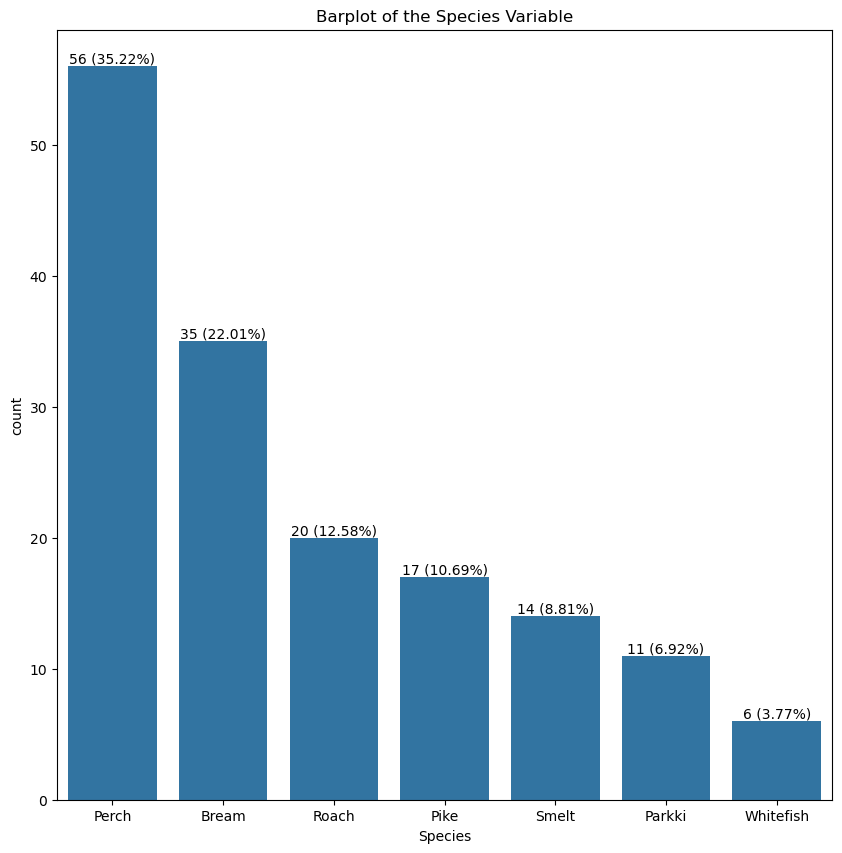

In [19]:
plt.figure(figsize = (10,10))
ax = sns.countplot(x = fish_data['Species'], order = fish_data['Species'].value_counts(ascending = False).index)

v = fish_data['Species'].value_counts(ascending = False)
v1 = fish_data['Species'].value_counts(ascending = False, normalize = True).values *100
lbls = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(v, v1)]

ax.bar_label(container = ax.containers[0], labels = lbls)

ax.set_title('Barplot of the Species Variable')

The histograms for each of the numerical variables don't look too unusual. Weight is right skewed, unimodal and centered around 275. Length1 is somewhat Normal shaped, with a slight right skew and is unimodal centered at around 30. Length2 and Length3 are quite similar with Length1 in appearance. Height is unimodal, centered at around 7, and has a right skew. Finally, Width is somewhat Normal shaped and is centered at around 4.

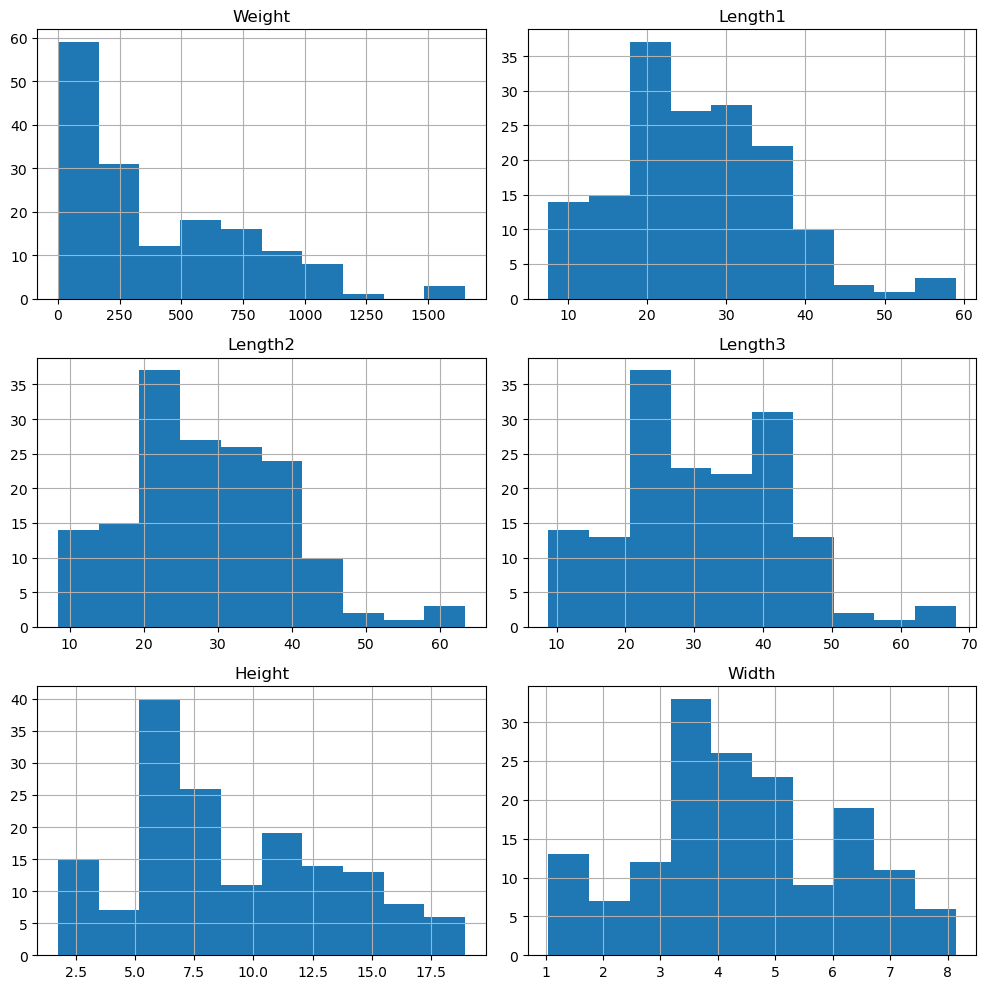

In [21]:
fish_data.hist(bins = 10, figsize = (10,10))
plt.tight_layout()

We can use the sample method from pandas with the parameter of setting the fraction of items to return to 1, or all. This shuffles the Dataframe without changing the original one.

In [29]:
fish_data_shuffled = fish_data.sample(frac = 1)

Let's separate out the X and y variables.

In [30]:
X = fish_data_shuffled.drop(columns = 'Weight')
X.head(5)

,Species,Length1,Length2,Length3,Height,Width
91,Perch,20.5,22.5,24.0,5.8560,3.6240
10,Bream,28.4,31.0,36.2,14.2628,5.1042
135,Pike,40.0,42.5,45.5,6.8250,4.4590
6,Bream,26.8,29.7,34.5,14.1795,5.2785
116,Perch,36.5,39.0,41.4,11.1366,7.4934


In [31]:
y = fish_data_shuffled['Weight']
y.head(5)

91     130.0
10     475.0
135    510.0
6      500.0
116    900.0
Name: Weight, dtype: float64

In [36]:
ratio = 0.8
total_rows = X.shape[0]
train_size = int(total_rows * ratio)

train_X = X[0:train_size]
test_X = X[train_size:]


train_y = y[0:train_size]
test_y = y[train_size:]

print(f"Training set shape for predictor variables: {train_X.shape}")
print(f"Testing set shape for predictor variables: {test_X.shape}")

print(f"Training set shape for response variable: {train_y.shape}")
print(f"Testing set shape for response variable: {test_y.shape}")

Training set shape for predictor variables: (127, 6)
Testing set shape for predictor variables: (32, 6)
Training set shape for response variable: (127,)
Testing set shape for response variable: (32,)


In [56]:
def min_max(column, rescaled_min = 0, rescaled_max = 1):
    min = column.min()
    max = column.max()
    return rescaled_min + (column - min) * (rescaled_max - rescaled_min) / (max - min)


In [58]:
temp = train_X[train_X.columns.difference(['Species'])].apply(min_max, axis = 0)
temp['Species'] = train_X.Species

train_X = temp
train_X.head(5)

,Height,Length1,Length2,Length3,Width,Species
91,0.239578,0.268041,0.273256,0.275362,0.363160,Perch
10,0.727534,0.430928,0.437984,0.496377,0.571803,Bream
135,0.295822,0.670103,0.660853,0.664855,0.480858,Pike
6,0.722699,0.397938,0.412791,0.465580,0.596372,Bream
116,0.546080,0.597938,0.593023,0.590580,0.908576,Perch


In [59]:
temp = test_X[test_X.columns.difference(['Species'])].apply(min_max, axis = 0)
temp['Species'] = test_X.Species

test_X = temp
test_X.head(5)

,Height,Length1,Length2,Length3,Width,Species
115,0.569499,0.488470,0.488372,0.477231,0.784443,Perch
13,0.797168,0.381551,0.391473,0.440801,0.589294,Bream
71,0.623759,0.266247,0.275194,0.289617,0.462774,Parkki
60,0.690945,0.545073,0.546512,0.553734,0.808335,Whitefish
12,0.786695,0.373166,0.381783,0.424408,0.482986,Bream


In [69]:
train_y = min_max(train_y)

train_y.head(5)


91     0.081250
10     0.296875
135    0.318750
6      0.312500
116    0.562500
Name: Weight, dtype: float64

In [70]:
test_y = min_max(test_y)

test_y.head(5)


115    0.414670
13     0.201268
71     0.176879
60     0.603683
12     0.298823
Name: Weight, dtype: float64

1600.0